# Convolutions and linear regression

There are 2 basic ingredients for neural nets

- convolutions
- multivariate linear regression

We'll start by doing convolutions.

- for the theory in french [read this](https://www.f-legrand.fr/scidoc/docmml/image/filtrage/convolution/convolution.html)
- we'll also be doing some image processing from [this tuto](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381)


---

The most common use of a convolution is the 
**moving average** = [moyenne mobile](https://fr.wikipedia.org/wiki/Moyenne_mobile)
which is used to smooth noisy data.

There is a simple exercise at the end.

I will add the excercise on image processing this evening.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Smoothing COVID data

So we'll see how a convolution works on real data.
We'll get the latest mortality figures from **GitHub**.

The [source](https://github.com/CSSEGISandData/COVID-19) is maintained by John Hopkins University.


In [113]:
! ../.g


[master 72c1a90] web
 2 files changed, 36 insertions(+)
 rename PROG/.ipynb_checkpoints/{Untitled1-checkpoint.ipynb => convolutions_etc-checkpoint.ipynb} (100%)
 rename PROG/{Untitled1.ipynb => convolutions_etc.ipynb} (99%)
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 115.12 KiB | 3.84 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   3899a24..72c1a90  master -> master


In [3]:
import requests
import pandas as pd

In [4]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)

## Visualising the data

We'll convert to a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

- If you want to know more [read this in french](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf).
- It's basically a table like in Excel
    - columns have names
    - rows are numbered and accessed using ```iloc```.


In [5]:
df = pd.read_csv('covid_deaths.csv')

In [21]:
' '.join(df.columns.tolist()[:20])

'Province/State Country/Region Lat Long 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20'

From the dates we see this is the latest data

In [22]:
' '.join(df.columns.tolist()[-10:])

'11/2/20 11/3/20 11/4/20 11/5/20 11/6/20 11/7/20 11/8/20 11/9/20 11/10/20 11/11/20'

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1541,1544,1548,1554,1554,1556,1558,1574,1577,1581
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,527,532,536,543,549,557,559,571,579,590
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1980,1980,1999,2011,2024,2036,2048,2062,2077,2093
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,289,291,296,299,300,303,307,308,308,312


## Looking for France

France is in the rows 116 - 126

'''df.loc[126]''' is what we want

In [24]:
df.iloc[116:127]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
116,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,70,70,70,70,70,70,70,70,70,70
117,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,38,38,39,39,39,39,39,49,52,52
118,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,...,126,133,133,133,133,133,133,133,139,139
119,Martinique,France,14.641500,-61.024200,0,0,0,0,0,0,...,30,30,33,33,33,33,33,33,37,37
120,Mayotte,France,-12.827500,45.166244,0,0,0,0,0,0,...,45,45,45,45,45,45,45,46,46,46
121,New Caledonia,France,-20.904305,165.618042,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,Reunion,France,-21.115100,55.536400,0,0,0,0,0,0,...,26,26,26,26,27,27,27,28,28,28
123,Saint Barthelemy,France,17.900000,-62.833300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,9,9,12,12,12,12,12,12,12,12


It's often easier to work with a numpy array of values

In [30]:
deaths = df.iloc[126][4:].values

# Cumulative deaths

this looks pretty smooth

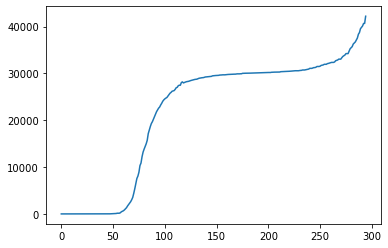

In [32]:
plt.plot(deaths)

But daily figures are noisy

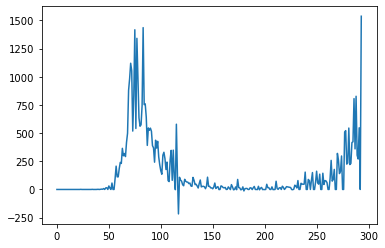

In [37]:
daily = deaths[1:] - deaths[:-1]
plt.plot(daily);

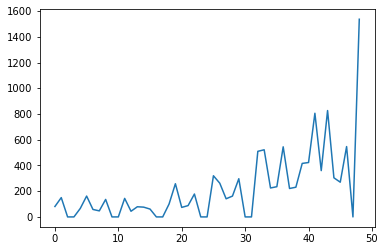

In [40]:
plt.plot(daily[-49:]);

---

## Weekdays


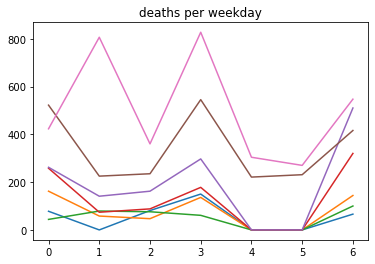

In [59]:
weeks = daily[-51:-2].reshape((-1,7))
for row in weeks:
    plt.plot(row)
    
plt.title('deaths per weekday');

In [51]:
df.columns.tolist()[-9:-2]

['11/3/20', '11/4/20', '11/5/20', '11/6/20', '11/7/20', '11/8/20', '11/9/20']

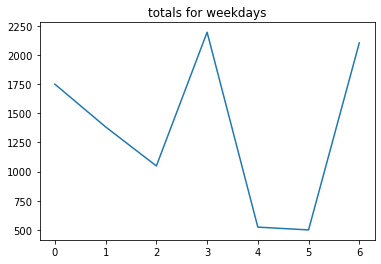

In [57]:
plt.plot(np.sum(weeks, axis=0))
plt.title('totals for weekdays');

## Smoothing



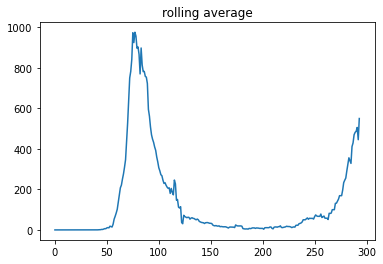

In [82]:
rolling_av = np.convolve(daily,np.ones(7)/7)[:-6]

plt.plot( rolling_av)
plt.title('rolling average');

In [83]:
np.where(rolling_av > 100)

(array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 270, 271, 272,
        273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
        286, 287, 288, 289, 290, 291, 292, 293]),)

Text(0.5, 1.0, 'comparing first and second waves')

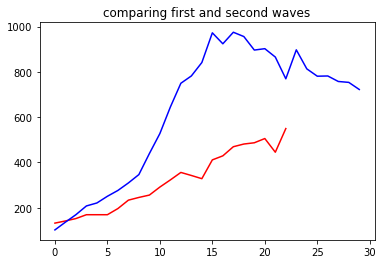

In [91]:
plt.plot(rolling_av[-23:],'r')
plt.plot(rolling_av[60:90],'b');
plt.title('comparing first and second waves')

# Not exponential linear growth in deaths

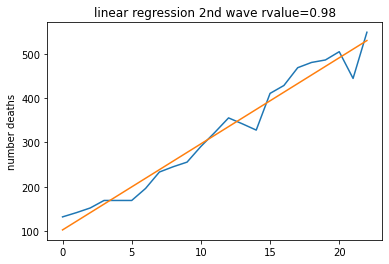

In [166]:
from scipy import stats

X, Y = np.arange(23), rolling_av[-23:].tolist()


plt.plot(X,Y);
coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept
plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('linear regression 2nd wave rvalue={:.2f}'.format(coeffs.rvalue))
plt.ylabel('number deaths');
    


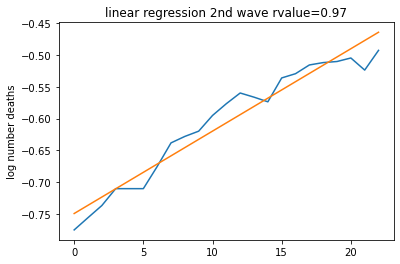

In [170]:
Y = np.log(Y)
plt.plot(X,Y)
coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept
plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('linear regression 2nd wave rvalue={:.2f}'.format(coeffs.rvalue))
plt.ylabel('log number deaths');

Both seem equq

The problem is that the exponential factor is tiny
and the doubling time is large !

In [157]:
np.exp(stats.linregress(X,Y).slope), np.log(2)/ stats.linregress(X,Y).slope

(1.0692519694483285, 10.351767070947615)

--- 

# Exo

I've studied only deaths for the second wave
the file '''covid_confirmed.csv''' 
contains all the stats for the positive cases.

1. Repeat the study above.
Is the growth exponential ?

1. What about the other countries ?

1. What about in the first wave





In [158]:
! ../.g

[master d7adec8] web
 1 file changed, 107 insertions(+), 10 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 25.33 KiB | 4.22 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   67746f8..d7adec8  master -> master
